# **UAS DEEP LEARNING - CHATBOT LAYANAN AKADEMIK UNIB**


## Nama Kelompok :


### 1.   Muhamad Rifqi Afriansyah (G1A021023)
### 2.   Vilda Aprilia (G1A021033)
### 3.   Muhamad Iqbal (G1A021073)






## **Menyiapkan library yang dibutuhkan**



In [2]:
!pip install indoNLP #or indonlp -> untuk mengganti slang/singkatan menjadi kata yang lebih formal -> sumber asli bisa liat di kamus alay dari nana

In [3]:
!pip install nlp-id # untuk stopwords removal dan lematisasi

In [7]:
# Menghapus instalasi pustaka yang bermasalah atau konflik versi
# Pustaka yang dihapus: gcsfs, fsspec, huggingface-hub, transformers, peft
!pip uninstall gcsfs fsspec huggingface-hub transformers peft -y

# Menginstal pustaka fsspec dengan versi spesifik (2024.10.0) yang kompatibel dengan gcsfs
# Ini dilakukan untuk menghindari konflik antara gcsfs dan versi fsspec lainnya
!pip install fsspec==2024.10.0

# Menginstal kembali pustaka gcsfs setelah memastikan bahwa fsspec memiliki versi yang sesuai
# gcsfs adalah pustaka yang membutuhkan fsspec dengan versi tertentu
!pip install gcsfs

# Menginstal pustaka huggingface-hub dengan versi minimal 0.25.0
# Versi ini diperlukan untuk kompatibilitas dengan transformers dan peft
!pip install huggingface-hub>=0.25.0

# Menginstal pustaka transformers, yang digunakan untuk pemrosesan model bahasa berbasis Transformer
# Pastikan huggingface-hub sudah kompatibel dengan transformers
!pip install transformers

# Menginstal pustaka peft, yang digunakan untuk fine-tuning model besar dengan pendekatan parameter-efficient
# Pastikan peft kompatibel dengan huggingface-hub dan transformers
!pip install peft

Found existing installation: gcsfs 2024.10.0
Uninstalling gcsfs-2024.10.0:
  Successfully uninstalled gcsfs-2024.10.0
Found existing installation: fsspec 2024.12.0
Uninstalling fsspec-2024.12.0:
  Successfully uninstalled fsspec-2024.12.0
Found existing installation: huggingface-hub 0.23.4
Uninstalling huggingface-hub-0.23.4:
  Successfully uninstalled huggingface-hub-0.23.4
Found existing installation: transformers 4.47.0
Uninstalling transformers-4.47.0:
  Successfully uninstalled transformers-4.47.0
Found existing installation: peft 0.14.0
Uninstalling peft-0.14.0:
  Successfully uninstalled peft-0.14.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.6/179.6 kB 5.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.29.0 requires gcsfs>=2023.3.0, which is not installed.
  Using cached fsspec-2024.12.0-py3-none-any.whl.metadata (11 kB

In [3]:
# Mengimpor modul 'drive' dari paket 'google.colab'
# Modul ini memungkinkan akses ke Google Drive dari dalam notebook Colab
from google.colab import drive

# Memasang (mount) Google Drive ke direktori '/content/drive'
# Setelah dipasang, Anda dapat mengakses file di Google Drive melalui path ini
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Import library untuk bekerja dengan format JSON (untuk membaca dan menulis file JSON)
import json

# Import NLTK (Natural Language Toolkit) untuk pemrosesan bahasa alami
import nltk

# Import library untuk bekerja dengan waktu (timer, penundaan, dll.)
import time

# Import library untuk menghasilkan nilai acak
import random

# Import modul untuk bekerja dengan ekspresi reguler (regex)
import re

# Import library untuk bekerja dengan string (manipulasi teks)
import string

# Import modul untuk menyimpan dan memuat objek Python dalam format biner
import pickle

# Import NumPy untuk operasi matematis dan manipulasi array
import numpy as np

# Import pandas untuk manipulasi data dan analisis data
import pandas as pd

# Import BytesIO untuk manipulasi aliran data dalam bentuk byte
from io import BytesIO

# Import TensorFlow untuk membuat dan melatih model pembelajaran mesin
import tensorflow as tf

# Import IPython untuk menampilkan elemen media seperti audio dan video
import IPython.display as ipd

# Import Matplotlib untuk membuat grafik dan visualisasi data
import matplotlib.pyplot as plt

# Import Lemmatizer dari pustaka nlp_id untuk stemming kata dalam bahasa Indonesia
from nlp_id.lemmatizer import Lemmatizer

# Import WordNetLemmatizer dari NLTK untuk stemming kata dalam bahasa Inggris
from nltk.stem import WordNetLemmatizer

# Import kelas Model dari TensorFlow Keras untuk membuat model deep learning
from tensorflow.keras.models import Model

# Import plot_model dari TensorFlow untuk memvisualisasikan arsitektur model
from tensorflow.keras.utils import plot_model

# Import LabelEncoder dari sklearn untuk mengubah label kategori menjadi angka
from sklearn.preprocessing import LabelEncoder

# Import train_test_split dari sklearn untuk membagi data menjadi set pelatihan dan pengujian
from sklearn.model_selection import train_test_split

# Import metrik evaluasi dari sklearn untuk mengevaluasi performa model
from sklearn.metrics import (
    accuracy_score,     # Untuk menghitung akurasi model
    precision_score,    # Untuk menghitung presisi
    recall_score,       # Untuk menghitung recall
    f1_score,           # Untuk menghitung skor F1
    classification_report  # Untuk menghasilkan laporan klasifikasi
)

# Import Tokenizer dari TensorFlow Keras untuk tokenisasi teks
from tensorflow.keras.preprocessing.text import Tokenizer

# Import layer LSTM, Embedding, dan Input untuk membangun model deep learning
from tensorflow.keras.layers import Input, Embedding, LSTM

# Import pad_sequences untuk memastikan panjang urutan teks sama
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Import layer tambahan dari TensorFlow Keras untuk membangun model
from tensorflow.keras.layers import Flatten, Dense, GlobalMaxPool1D


In [11]:
# Package sentence tokenizer
nltk.download('omw-1.4')
# Package lemmatization
nltk.download('punkt')
# Package multilingual wordnet data
nltk.download('wordnet')
# Download the required 'punkt_tab' data package
nltk.download('punkt_tab') # This line downloads the required data

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

## **Load dataset intent.json**

Hal yang perlu dilakukan:
1. Menambah jumlah dataset dari dialog percakapan chatbot

In [25]:
# Membuka file JSON yang berisi dataset chatbot (intents) dari Google Drive
# Menggunakan 'with open' untuk memastikan file ditutup setelah digunakan
with open('/content/drive/MyDrive/Dataset Chatbot/intents.json') as content:
    data1 = json.load(content)  # Memuat isi file JSON ke dalam variabel 'data1' sebagai dictionary

# Inisialisasi variabel untuk menyimpan data yang diperlukan
tags = []          # Daftar untuk menyimpan semua tag dari dataset
inputs = []        # Daftar untuk menyimpan semua pola (patterns) input
responses = {}     # Dictionary untuk menyimpan respons berdasarkan tag
words = []         # Daftar untuk menyimpan semua kata unik dari pola
classes = []       # Daftar untuk menyimpan semua kategori (tag unik)
documents = []     # Daftar untuk menyimpan pasangan kata (token) dengan tag-nya
ignore_words = ['?', '!', '.', '“', '”', '(', ')', ',', '’', '/', '\\']  # Karakter yang akan diabaikan

# Iterasi melalui setiap intent dalam file JSON
for intent in data1['intents']:
    responses[intent['tag']] = intent['responses']  # Menyimpan respons untuk setiap tag
    for lines in intent['patterns']:
        inputs.append(lines)  # Menambahkan pola input ke daftar
        tags.append(intent['tag'])  # Menambahkan tag terkait ke daftar
        for pattern in intent['patterns']:
            w = nltk.word_tokenize(pattern)  # Tokenisasi setiap pola menjadi kata-kata (tokens)
            words.extend(w)  # Menambahkan kata-kata ke daftar 'words'
            documents.append((w, intent['tag']))  # Menyimpan pasangan kata (tokens) dan tag
            if intent['tag'] not in classes:  # Menambahkan tag baru ke daftar kelas jika belum ada
                classes.append(intent['tag'])

# Konversi data input (patterns) dan tag ke dalam DataFrame untuk analisis
data = pd.DataFrame({"patterns": inputs, "tags": tags})  # Membuat DataFrame dengan kolom 'patterns' dan 'tags'

# Menampilkan semua kata yang telah dikumpulkan
print(words)


['hallo', 'hai', 'halo', 'hei', 'hi', 'hy', 'pagi', 'morning', 'siang', 'afternoon', 'sore', 'malam', 'bro', 'sis', 'kawan', 'sobat', 'hallo', 'hai', 'halo', 'hei', 'hi', 'hy', 'pagi', 'morning', 'siang', 'afternoon', 'sore', 'malam', 'bro', 'sis', 'kawan', 'sobat', 'hallo', 'hai', 'halo', 'hei', 'hi', 'hy', 'pagi', 'morning', 'siang', 'afternoon', 'sore', 'malam', 'bro', 'sis', 'kawan', 'sobat', 'hallo', 'hai', 'halo', 'hei', 'hi', 'hy', 'pagi', 'morning', 'siang', 'afternoon', 'sore', 'malam', 'bro', 'sis', 'kawan', 'sobat', 'hallo', 'hai', 'halo', 'hei', 'hi', 'hy', 'pagi', 'morning', 'siang', 'afternoon', 'sore', 'malam', 'bro', 'sis', 'kawan', 'sobat', 'hallo', 'hai', 'halo', 'hei', 'hi', 'hy', 'pagi', 'morning', 'siang', 'afternoon', 'sore', 'malam', 'bro', 'sis', 'kawan', 'sobat', 'hallo', 'hai', 'halo', 'hei', 'hi', 'hy', 'pagi', 'morning', 'siang', 'afternoon', 'sore', 'malam', 'bro', 'sis', 'kawan', 'sobat', 'hallo', 'hai', 'halo', 'hei', 'hi', 'hy', 'pagi', 'morning', 'siang

In [26]:
# Menggabungkan semua kata dalam daftar 'words' menjadi satu string
# Kata-kata diubah menjadi huruf kecil (lowercase), dan tanda baca (punctuation) dihapus
words = " ".join([str(word.lower()) for word in words if word not in string.punctuation])

# Menyimpan string hasil penggabungan ke variabel 'qwerty' untuk referensi lebih lanjut
qwerty = words

# Membuat instance dari Lemmatizer dari pustaka nlp_id
# Lemmatizer ini digunakan untuk melakukan lemmatization (mengembalikan kata ke bentuk dasarnya) dalam bahasa Indonesia
lemmatizer = Lemmatizer()

# Melakukan lemmatization pada string 'words' untuk mendapatkan kata dalam bentuk dasar
words = lemmatizer.lemmatize(words)

# Membagi string hasil lemmatization kembali menjadi daftar kata-kata unik
# 'set' digunakan untuk menghilangkan duplikasi kata, dan 'sorted' untuk mengurutkan kata secara alfabetis
words = sorted(list(set(words.split())))

# Menampilkan jumlah kata unik setelah lemmatization dan daftar kata tersebut
print(len(words), "unique lemmatized words", words)

494 unique lemmatized words ['1', '2', '3', '4', 'absensi', 'account', 'ada', 'adakan', 'adalah', 'administrasi', 'afternoon', 'agar', 'aja', 'aju', 'akademik', 'akan', 'akhir', 'akses', 'aktif', 'aktivasi', 'aktivis', 'akun', 'alamat', 'alumni', 'ambil', 'amil', 'ampu', 'andai', 'anggota', 'antara', 'apa', 'apabila', 'apakah', 'aplikasi', 'atau', 'awal', 'b', 'badan', 'bagai', 'bagaiamana', 'bagaimana', 'bai', 'bakar', 'balas', 'banjir', 'bank', 'bantu', 'banyak', 'barang', 'baru', 'batas', 'bawa', 'bayar', 'baznas', 'bbp-ppa', 'bca', 'beasiswa', 'beban', 'beda', 'begitu', 'belum', 'benar', 'benefit', 'bentuk', 'berapa', 'beri', 'berita', 'berkas', 'bfi', 'biasa', 'biaya', 'bidikmisi', 'bila', 'biro', 'bisa', 'bkd', 'bkm', 'boleh', 'bri', 'bro', 'buah', 'buat', 'buka', 'bukan', 'bukti', 'buku', 'bulan', 'bye', 'byee', 'c', 'call', 'cantum', 'cara', 'career', 'cendekia', 'center', 'cerita', 'cflt', 'class', 'covid-19', 'cuti', 'd', 'dadah', 'daftar', 'dah', 'dalam', 'dan', 'dapat', 'da

In [27]:
# Menampilkan Data
data[30:50]

,patterns,tags
30,Dimana Mahasiswa dapat melihat Daftar Nilai ?,daftar_nilai1
31,Bagaimana Cara mengambil Daftar Nilai ?,daftar_nilai2
32,Dimana Saya dapat mengambil Daftar Nilai ?,daftar_nilai3
33,Apabila nilai mata kuliah Saya dari Dosen B ak...,daftar_nilai4
34,Bagaimana mekanisme menghapus nilai / mata kul...,daftar_nilai5
35,Apa yang dimaksud dengan Registrasi ?,Registrasi1
36,Apa beda dari Registrasi dengan Registrasi ?,Registrasi2
37,Kapan Registrasi dilaksanakan ?,Registrasi3
38,Kemana Saya harus mengurus Registrasi ?,Registrasi4
39,Apa saja persyaratan Registrasi ?,Registrasi5


In [28]:
# Analisis dataset - ketahui jumlah tag terbanyak

def get_tags(x):
  x['tags'] = x['tags'].apply(lambda x: re.sub(r"\d+", "", x))
  x = x.drop_duplicates(subset=['tags'], keep="first")
  return [i for i in x['tags']]

def count_tag(x):
  jumlah_tag = {}
  # Buat list kata yang ingin dihitung
  list_of_tag = get_tags(x)
  # Hitung jumlah kemunculan setiap kata
  for tag in list_of_tag:
     jumlah_tag[tag] = df_tag['tags'].str.contains(re.escape(tag)).sum()
  # Kembalikan hasil
  return jumlah_tag

df_tag = pd.DataFrame(data['tags'])
jumlah_tag = count_tag(df_tag)

In [29]:
# Menampilkan banyaknya jumlah tag

keys = list(jumlah_tag.keys())
values = list(jumlah_tag.values())
values = [int(x) for x in values]

df_tags = pd.DataFrame({"tag": keys, "jumlah": values})
df_tags[30:50]

,tag,jumlah
30,unit_kegiatan_mahasiswa,8
31,beban_kinerja_dosen,3
32,informasi_dosen,1
33,pelayanan_Akademik Unib,4
34,pembayaran_virtual_account,3
35,rekening_pembayaran,1
36,status_pembayaran,5
37,tagihan,8
38,fakultas_keguruan_dan_ilmu_pendidikan,1
39,fakultas_ilmu_komunikasi,1


## **Preproses data**

In [32]:
# Menghilangkan tanda baca (punctuation) dari kolom 'patterns' pada DataFrame 'data'
# Untuk setiap pola (pattern), mengiterasi setiap karakter dan menghapus karakter yang termasuk tanda baca
data['patterns'] = data['patterns'].apply(lambda wrd: [ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])

# Setelah tanda baca dihapus, menggabungkan kembali daftar karakter menjadi string
# Misalnya: ['h', 'e', 'l', 'l', 'o'] -> "hello"
data['patterns'] = data['patterns'].apply(lambda wrd: ''.join(wrd))

# Menampilkan baris ke-30 hingga ke-50 dari DataFrame untuk memeriksa hasil transformasi
data[30:50]

,patterns,tags
30,mana mahasiswa dapat lihat daftar nilai,daftar_nilai1
31,bagaimana cara ambil daftar nilai,daftar_nilai2
32,mana saya dapat ambil daftar nilai,daftar_nilai3
33,apabila nilai mata kuliah saya dari dosen b ak...,daftar_nilai4
34,bagaimana mekanisme hapus nilai mata kuliah pa...,daftar_nilai5
35,apa yang maksud dengan registrasi,Registrasi1
36,apa beda dari registrasi dengan registrasi,Registrasi2
37,kapan registrasi laksana,Registrasi3
38,mana saya harus urus registrasi,Registrasi4
39,apa saja syarat registrasi,Registrasi5


In [33]:
# Melakukan lemmatization pada setiap pola (pattern) di kolom 'patterns' pada DataFrame 'data'
# Setiap kata dalam pattern dilemmatize menggunakan fungsi 'lemmatizer.lemmatize()'
# Hasilnya adalah daftar kata setelah proses lemmatization
data['patterns'] = data['patterns'].apply(lambda wrd: [lemmatizer.lemmatize(wrd)])

# Setelah lemmatization, daftar kata digabungkan kembali menjadi string utuh
# Misalnya: ['bermain'] -> "bermain"
data['patterns'] = data['patterns'].apply(lambda wrd: ''.join(wrd))

# Menampilkan baris ke-30 hingga ke-50 dari DataFrame untuk memeriksa hasil transformasi
data[30:50]

,patterns,tags
30,mana mahasiswa dapat lihat daftar nilai,daftar_nilai1
31,bagaimana cara ambil daftar nilai,daftar_nilai2
32,mana saya dapat ambil daftar nilai,daftar_nilai3
33,apabila nilai mata kuliah saya dari dosen b ak...,daftar_nilai4
34,bagaimana mekanisme hapus nilai mata kuliah pa...,daftar_nilai5
35,apa yang maksud dengan registrasi,Registrasi1
36,apa beda dari registrasi dengan registrasi,Registrasi2
37,kapan registrasi laksana,Registrasi3
38,mana saya harus urus registrasi,Registrasi4
39,apa saja syarat registrasi,Registrasi5


In [34]:
# Menyortir data kelas tag
classes = sorted(list(set(classes)))
print (len(classes), "classes", classes)

316 classes ['PAK (Portal Akademik)', 'PAK (Portal Akademik)1', 'PAK (Portal Akademik)10', 'PAK (Portal Akademik)11', 'PAK (Portal Akademik)12', 'PAK (Portal Akademik)13', 'PAK (Portal Akademik)14', 'PAK (Portal Akademik)15', 'PAK (Portal Akademik)16', 'PAK (Portal Akademik)2', 'PAK (Portal Akademik)3', 'PAK (Portal Akademik)4', 'PAK (Portal Akademik)5', 'PAK (Portal Akademik)6', 'PAK (Portal Akademik)7', 'PAK (Portal Akademik)8', 'PAK (Portal Akademik)9', 'PAK (Portal Akademik)_3', 'Registrasi1', 'Registrasi2', 'Registrasi3', 'Registrasi4', 'Registrasi5', 'Registrasi6', 'Registrasi7', 'Registrasi8', 'Unib1', 'Unib2', 'Unib3', 'Unib4', 'Unib5', 'absensi1', 'absensi2', 'absensi3', 'absensi4', 'beasiswa1', 'beasiswa10', 'beasiswa11', 'beasiswa12', 'beasiswa13', 'beasiswa14', 'beasiswa15', 'beasiswa16', 'beasiswa17', 'beasiswa18', 'beasiswa19', 'beasiswa2', 'beasiswa20', 'beasiswa21', 'beasiswa22', 'beasiswa3', 'beasiswa4', 'beasiswa5', 'beasiswa6', 'beasiswa7', 'beasiswa8', 'beasiswa9', 

In [35]:
# Mencetak jumlah keseluruhan data teks
# documents = kombinasi antara patterns and intents
print (len(documents), "documents")

676 documents


In [36]:
# Membuat instance tokenizer dari TensorFlow Keras
# Parameter 'num_words=2000' menunjukkan bahwa hanya 2000 kata yang paling sering muncul yang akan dipertimbangkan
tokenizer = Tokenizer(num_words=2000)

# Melatih tokenizer pada kolom 'patterns' dalam DataFrame 'data'
# Proses ini menghasilkan indeks untuk setiap kata berdasarkan frekuensinya dalam dataset
tokenizer.fit_on_texts(data['patterns'])

# Mengubah teks dalam kolom 'patterns' menjadi urutan numerik berdasarkan indeks kata
# Misalnya: Jika "main" memiliki indeks 1 dan "belajar" memiliki indeks 2, maka teks "main belajar" -> [1, 2]
train = tokenizer.texts_to_sequences(data['patterns'])

# Menampilkan hasil tokenisasi berupa daftar urutan numerik untuk setiap pola dalam dataset
train

[[250],
 [251],
 [252],
 [253],
 [254],
 [255],
 [256],
 [257],
 [258],
 [259],
 [260],
 [261],
 [262],
 [263],
 [264],
 [265],
 [266],
 [267],
 [169],
 [268],
 [269, 169],
 [270, 271],
 [170, 272],
 [273],
 [274, 171],
 [275],
 [276, 171],
 [172, 173],
 [277],
 [172, 173, 278],
 [5, 9, 6, 46, 15, 64],
 [2, 18, 27, 15, 64],
 [5, 10, 6, 27, 15, 64],
 [50,
  64,
  67,
  37,
  10,
  51,
  47,
  279,
  174,
  68,
  4,
  102,
  15,
  64,
  131,
  280,
  175,
  11,
  281],
 [2, 69, 282, 64, 67, 37, 41, 15, 64],
 [1, 3, 88, 56, 52],
 [1, 283, 51, 52, 56, 52],
 [42, 52, 43],
 [5, 10, 28, 176, 52],
 [1, 12, 14, 52],
 [5, 19, 6, 21],
 [2, 18, 19, 44, 1, 12, 3, 28, 10, 21],
 [50, 13, 132, 53, 284, 89, 9, 2],
 [1, 3, 88, 56, 57],
 [42, 57, 177],
 [2, 285, 57, 10, 90],
 [1, 3, 88, 56, 91, 57],
 [2, 69, 286, 57],
 [2, 50, 57, 287, 288, 289, 290, 103, 291],
 [2, 8, 104, 6, 57, 44, 29, 27, 57],
 [2, 8, 105, 27, 57, 68, 178],
 [5, 10, 11, 46, 39, 92, 3, 292],
 [42, 40, 30, 4, 133],
 [5, 9, 11, 46, 106,

In [38]:
# Menerapkan padding pada data tokenisasi untuk memastikan bahwa semua urutan memiliki panjang yang sama
# 'pad_sequences' menambahkan padding (biasanya nol) ke urutan yang lebih pendek agar sesuai dengan panjang urutan terpanjang
X_train = pad_sequences(train)

# Menampilkan hasil setelah padding diterapkan
# Setiap urutan sekarang memiliki panjang yang sama, sesuai dengan panjang maksimum dalam dataset
print(X_train)  # Padding sequences

[[  0   0   0 ...   0   0 250]
 [  0   0   0 ...   0   0 251]
 [  0   0   0 ...   0   0 252]
 ...
 [  0   0   0 ...  84  85  86]
 [  0   0   0 ...  84  85  86]
 [  0   0   0 ...  84  85  86]]


In [37]:
# Membuat instance dari LabelEncoder untuk mengubah data kategori menjadi angka
le = LabelEncoder()

# Mengubah kolom 'tags' menjadi nilai numerik
# LabelEncoder akan memberikan nilai unik (numerik) untuk setiap kategori di 'tags'
# Misalnya: "greeting" -> 0, "goodbye" -> 1, dll.
y_train = le.fit_transform(data['tags'])

# Menampilkan hasil encoding output
# Output ini adalah representasi numerik dari label yang sebelumnya berupa kategori teks
print(y_train)

[112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 111 111
 111 111 111 111 111 111 111 282 282 282 282 282  91  92  93  94  95  18
  19  20  21  22  23  24  25 113 114 115 116 117 118 119 120 123 130 140
 141 142 143 144 145 146 147 131 132 133 134 135 136 137 138 139 148 149
 150 151 239 240 241 250 251 252 253 254 255 256   1   9  10  11  12  13
  14  15  16   2   3   4   5   6   7   8   0   0  17  96  97 242 243 283
 284 285 286  81  83  84  85  86  87  88  89  90  82 121 100 101 102 103
 104 105 106 200 201 202 203 204  63  73  74  75  76  77  78  79  80  64
  65  66  67  68  69  70  71  72 258 259 260  35  46  50  51  52  53  54
  55  56  36  37  38  39  40  41  42  43  44  45  47  48  49  62 129 168
 169 170 171 172 173 205 206 207 208 209 210 211 231 232 233 234 304 305
 306 307 308 309 310 311  57  58  59 122 215 216 217 218 219 220 221 257
 261 262 263 264 265 269 270 271 272 273 274 275 276 109 107 108 110 161
 162 163 164 165 124 125 126 127 128 235 236 237 23

# **Input Length, Output Length and Vocabulary**

In [40]:
# Mendapatkan panjang input dari data pelatihan setelah proses padding
# 'X_train.shape' mengembalikan bentuk array NumPy dalam format (jumlah_sampel, panjang_urutan)
# '[1]' merujuk pada dimensi kedua, yaitu panjang urutan input
input_shape = X_train.shape[1]

# Menampilkan panjang input
# Panjang ini akan digunakan sebagai dimensi input dalam model deep learning
print(input_shape)

20


In [41]:
# Mendapatkan jumlah kata unik dalam tokenizer
# 'tokenizer.word_index' adalah dictionary yang berisi kata-kata unik sebagai kunci dan indeksnya sebagai nilai
# Fungsi 'len()' digunakan untuk menghitung jumlah kata unik dalam dictionary tersebut
vocabulary = len(tokenizer.word_index)

# Menampilkan jumlah kata unik dalam dataset
print("number of unique words : ", vocabulary)

number of unique words :  496


In [42]:
# Mendapatkan panjang output dari jumlah kelas unik dalam label encoder
# 'le.classes_' adalah array yang berisi semua label unik yang dipelajari oleh LabelEncoder
# 'le.classes_.shape[0]' memberikan jumlah total kelas unik
output_length = le.classes_.shape[0]

# Menampilkan panjang output (jumlah kelas unik)
print("output length: ", output_length)

output length:  316


## **Save Model Words & Classes**

In [44]:
# Menyimpan daftar 'words' ke dalam file menggunakan modul 'pickle'
# File disimpan dalam format biner ('wb' = write binary)
# Lokasi penyimpanan: '/content/words.pkl'
pickle.dump(words, open('/content/words.pkl', 'wb'))

# Menyimpan daftar 'classes' ke dalam file menggunakan modul 'pickle'
# File disimpan dalam format biner ('wb' = write binary)
# Lokasi penyimpanan: '/content/classes.pkl'
pickle.dump(classes, open('/content/classes.pkl', 'wb'))


## **Save Label Encoder & Tokenizer**

In [45]:
# Menyimpan objek LabelEncoder ('le') ke dalam file menggunakan modul 'pickle'
# File disimpan dalam format biner ('wb' = write binary)
# Lokasi penyimpanan: 'labelencoder.pkl'
pickle.dump(le, open('labelencoder.pkl', 'wb'))

# Menyimpan objek Tokenizer ('tokenizer') ke dalam file menggunakan modul 'pickle'
# File disimpan dalam format biner ('wb' = write binary)
# Lokasi penyimpanan: 'tokenizers.pkl'
pickle.dump(tokenizer, open('tokenizers.pkl', 'wb'))


## **Membangun model dengan Neural Network**

In [46]:
# Membuat arsitektur model menggunakan TensorFlow Keras Functional API

# Layer Input: Mendefinisikan input dengan bentuk sesuai panjang urutan (input_shape)
# 'input_shape' adalah panjang dari setiap urutan setelah padding
i = Input(shape=(input_shape,))

# Layer Embedding: Mengubah indeks kata menjadi representasi vektor berdimensi 20
# Dimensi kosakata adalah 'vocabulary + 1' untuk memasukkan indeks nol (padding)
x = Embedding(vocabulary + 1, 20)(i)

# Layer LSTM: Menambahkan Long Short-Term Memory layer untuk mempelajari urutan kata
# LSTM memiliki 20 unit, dan 'return_sequences=True' untuk mengembalikan urutan keluaran
x = LSTM(20, return_sequences=True)(x)

# Layer Flatten: Mengubah keluaran LSTM (3D tensor) menjadi vektor 1D untuk layer Dense
x = Flatten()(x)

# Layer Dense: Menambahkan layer fully connected dengan jumlah neuron sesuai jumlah kelas
# 'output_length' adalah jumlah kelas unik, menggunakan aktivasi softmax untuk probabilitas
x = Dense(output_length, activation="softmax")(x)

# Membuat model dengan TensorFlow Keras Functional API
# Input adalah 'i' dan output adalah 'x'
model = Model(i, x)

# Kompilasi model: Menentukan fungsi loss, optimizer, dan metrik evaluasi
# - Loss: 'sparse_categorical_crossentropy' cocok untuk target yang berupa integer label
# - Optimizer: 'adam' adalah optimizer adaptif yang bekerja dengan baik untuk berbagai kasus
# - Metrics: 'accuracy' digunakan untuk mengevaluasi performa model
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

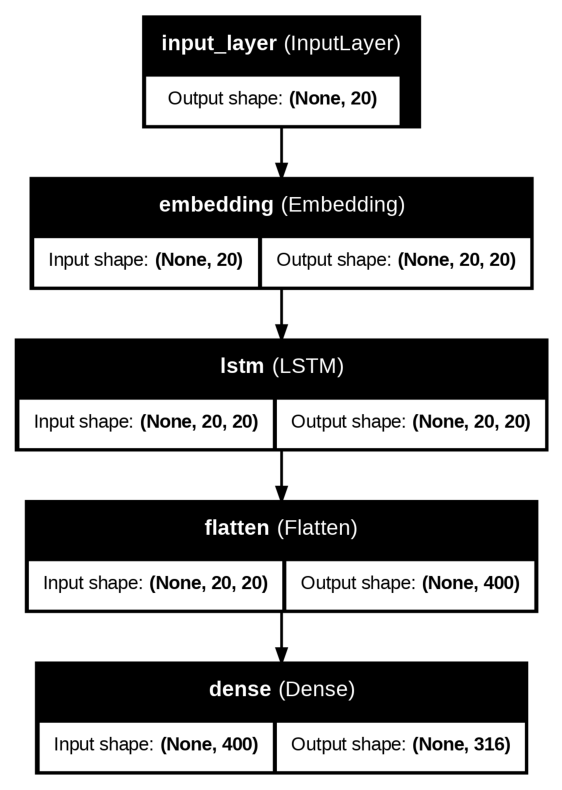

In [47]:
# Visualisasi Plot Arsitektur Model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Tampilkan plot model
img = plt.imread('model_plot.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

In [48]:
# Menampilkan Parameter Model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 20, 20)              │           9,940 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 20, 20)              │           3,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 316)                 │         126,716 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 139,936 (546.62 KB)

 Trainable params: 139,936 (546.62 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Melatih model dengan data pelatihan (X_train dan y_train)
# Parameter:
# - 'epochs=305': Model akan dilatih selama 300 epoch (siklus penuh melalui dataset)
# - 'X_train': Data input berupa urutan kata (tokenized dan padded)
# - 'y_train': Label output yang telah di-encode menjadi angka
train = model.fit(X_train, y_train, epochs=300)


Epoch 1/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0071 - loss: 5.7592
Epoch 2/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0581 - loss: 5.7498 
Epoch 3/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0463 - loss: 5.7396
Epoch 4/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0473 - loss: 5.7122 
Epoch 5/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0619 - loss: 5.6165 
Epoch 6/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0619 - loss: 5.5025 
Epoch 7/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0535 - loss: 5.4672 
Epoch 8/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0609 - loss: 5.3796 
Epoch 9/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0714 - loss: 5.3949 
Epoch 10/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0743 - loss: 5.2860 
Epoch 11/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1107 - loss: 5.0775
Epoch 12/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - a

## **Model Analysis**

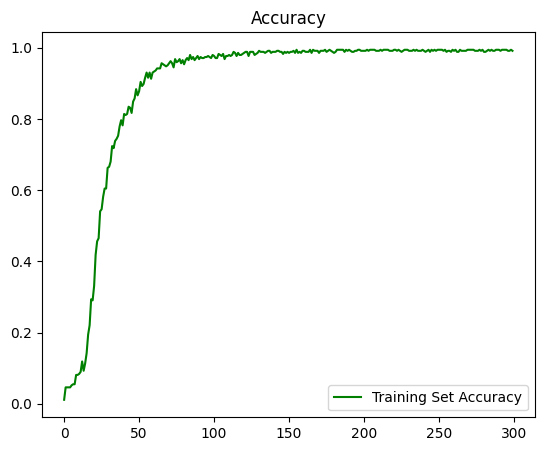

In [50]:
# Membuat visualisasi akurasi selama pelatihan model
# 'plt.figure()' digunakan untuk membuat kanvas baru dengan ukuran 14x5
plt.figure(figsize=(14, 5))

# Membuat subplot untuk visualisasi akurasi (1 dari 2 grafik)
# '1, 2, 1' berarti 1 baris, 2 kolom, dan ini adalah subplot pertama
plt.subplot(1, 2, 1)

# Memplot akurasi pelatihan dari objek 'train.history'
# 'train.history['accuracy']' berisi daftar akurasi untuk setiap epoch
plt.plot(train.history['accuracy'], label='Training Set Accuracy', color='green')

# Menambahkan legenda pada grafik, diletakkan di sudut kanan bawah ('lower right')
plt.legend(loc='lower right')

# Menambahkan judul grafik
plt.title('Accuracy')

# Menyimpan grafik sebagai file gambar PNG
# File akan disimpan dengan nama 'grafik_accuracy.png'
# 'bbox_inches="tight"' memastikan grafik tidak terpotong
plt.savefig('grafik_accuracy.png', bbox_inches='tight')

# Menampilkan grafik di layar
plt.show()

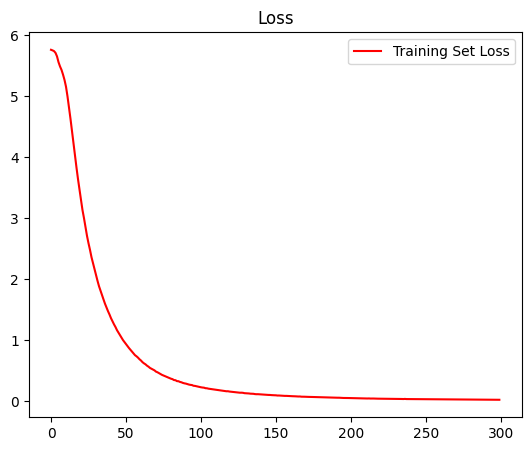

In [51]:
# Membuat visualisasi loss selama pelatihan model
# 'plt.figure()' digunakan untuk membuat kanvas baru dengan ukuran 14x5
plt.figure(figsize=(14, 5))

# Membuat subplot untuk visualisasi loss (2 dari 2 grafik)
# '1, 2, 2' berarti 1 baris, 2 kolom, dan ini adalah subplot kedua
plt.subplot(1, 2, 2)

# Memplot loss pelatihan dari objek 'train.history'
# 'train.history['loss']' berisi daftar loss untuk setiap epoch
plt.plot(train.history['loss'], label='Training Set Loss', color='red')

# Menambahkan legenda pada grafik, diletakkan di sudut kanan atas ('upper right')
plt.legend(loc='upper right')

# Menambahkan judul grafik
plt.title('Loss')

# Menyimpan grafik sebagai file gambar PNG
# File akan disimpan dengan nama 'grafik_loss.png'
# 'bbox_inches="tight"' memastikan grafik tidak terpotong
plt.savefig('grafik_loss.png', bbox_inches='tight')

# Menampilkan grafik di layar
plt.show()


In [52]:
# Membuat prediksi dengan model yang telah dilatih
y_pred = model.predict(X_train)
y_pred = y_pred.argmax(axis=1)

# Menghitung Nilai Akurasi
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Accuracy: 0.9941860465116279


## **Pengujian**

In [54]:
# Menentukan batas probabilitas
batas_probabilitas = 0.8

# Membuat Input Chat
while True:
  texts_p = []
  prediction_input = input('‍ Kamu : ')

  # Preprocessing teks
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  prediction_input = lemmatizer.lemmatize(prediction_input)
  texts_p.append(prediction_input)

  # Tokenisasi dan Padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input], input_shape)

  # Mendapatkan hasil keluaran pada model
  output = model.predict(prediction_input)
  output_probabilitas = round(output.max(), 2)
  output = output.argmax()

  # Memeriksa probabilitas
  if output_probabilitas < batas_probabilitas:
    print(" Unibbot : Maaf, saya tidak mengerti pertanyaan anda.")
  else:
    # Menemukan respon sesuai data tag dan memainkan voice bot
    response_tag = le.inverse_transform([output])[0]
    print(" Unibbot : ", random.choice(responses[response_tag]))

  time.sleep(0.08)
  print("="*60 + "\n")

  # Tambahkan respon 'goodbye' agar bot bisa berhenti
  if response_tag == "goodbye":
    break


‍ Kamu : hai
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
 Unibbot :  Halo! Aku Unibbot yang akan menjawab pertanyaanmu seputar UNIB, apa yang ingin kamu tanyakan?

‍ Kamu : ijazah
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
 Unibbot :  Hai! Unibbot hadir untukmu di sini. Informasi apa yang ingin kamu tau?

‍ Kamu : ijazah hilang
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
 Unibbot : Maaf, saya tidak mengerti pertanyaan anda.

‍ Kamu : Bagaimana mekanisme legalisir ijazah ?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
 Unibbot :  Ke fakultas masing-masing, membawa ijazah asli dan fotocopy ijazah

‍ Kamu : terima kasih
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
 Unibbot :  Dengan senang hati:)

‍ Kamu : sampai jumpa
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
 Unibbot :  Bye!



In [55]:
# Simpan model dalam bentuk format file .h5 atau .pkl (pickle)
model.save('/content/chatbot_model.h5')

print('Model Created Successfully!')

Model Created Successfully!


## **Kesimpulan**

Setelah melakukan proses pelatihan model LSTM, didapatkan hasil yang sangat memuaskan. Berikut adalah ringkasan hasil:

### **Hasil Akhir Pelatihan**
- **Accuracy pada epoch terakhir:** 0,9968
- **Loss pada epoch terakhir:** 0,0178

### **Parameter Pelatihan**
- **Jumlah epoch:** 300.

### **Rata-rata Keseluruhan**
- **Rata-rata nilai accuracy:** 0,9212.
- **Rata-rata nilai loss:** 0,4893.

Hasil ini menunjukkan bahwa model LSTM memiliki performa yang sangat baik dalam mempelajari pola data, dengan tingkat error (loss) yang sangat rendah dan tingkat akurasi yang hampir mendekati sempurna pada akhir pelatihan. Model ini siap untuk digunakan dalam pengujian atau implementasi.
